In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from blackjack_helper import *

# Card Translation
For efficient calculation, the cards will be translated to integers.
| 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | J | Q | K | A |
| - | ----------|----------| ----------| ----------| ----------| ----------| ----------| ----------| ----------| ----------| ----------| ----------|
| 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 10 | 10 | 10 | 11 |

Every Face Card can simple be treated as 10, because they do not affect play.  
The Ace will be treated as 11, and will be reduced to 1 if the hand value exceeds 21.

In [2]:
deck = get_deck()
print_deck(deck)

    2   3   4   5   6   7   8   9  10   A
0  16  16  16  16  16  16  16  16  16  64


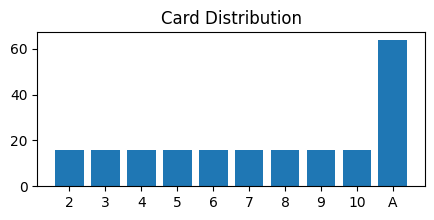

In [3]:
plot_deck(deck)

# The Hands
A hand can be characterized by two values:
- The sum of the cards in the hand (score)
- The number of Aces in the hand
If the score is over 21 and the number of aces is greater than 0, the score will be decreased by 10.

In order to represent each possible situation, we also have to include the card distribution (which changes with each draw).

In [4]:
hand = get_hand(deck)
print_hand(hand)

   P_S  P_A  D_S  D_A   2   3   4   5   6   7   8   9  10   A
0    0    0    0    0  16  16  16  16  16  16  16  16  16  64


# The Dealer
The dealer has a certain set of rules, by which he has to play the game. This makes it possible to determine the probabilities of the dealer's hand based on the card distribution. To efficiently generate those probabilities, we will first determine all possible games for the dealer.

To do this, we will use a numpy array, where the first column denotes the number of aces in the hand, and all other columns denote the drawn card (0 meaning no card drawn).
After each draw, we will check if the dealer will terminate the hands, and remove them.
There will be no probability calculation, as those depend on the card distribution.

,0,17,18,19,20,21
Count,129,32,32,32,32,32


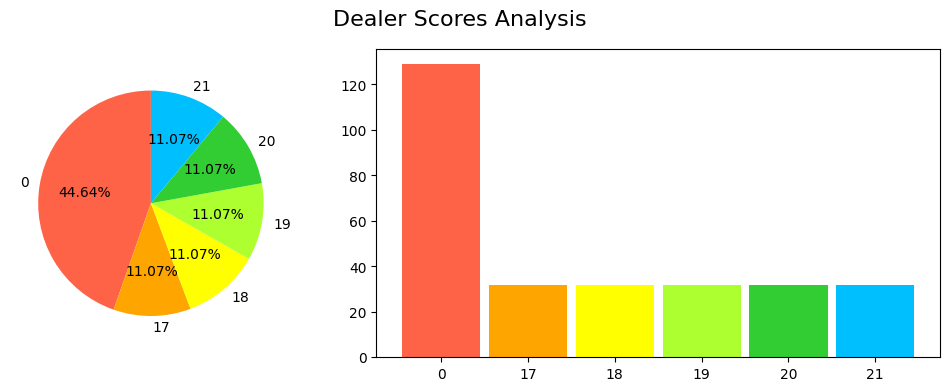

In [20]:
cards = [11,5]

probabilities = get_dealer_possibilities(cards)
plot_dealer_possibilities(cards)
probabilities.T

Remember that those numbers represent the number of possible games leading to that score, NOT the actual probabilities of that Score occurring. In order to do this, we will need to implement the card distribution.